# Random Variables

**Learning Objectives:** Learn about random variables and their relationship to discrete and continouous probability distributions. Learn to apply these tools to build generative models of data.

## Imports

In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from ipywidgets import interact, fixed

## Random variables

We have learned previously that a *variable* is a quantity that has been measured or observed. These variables are usually encoded using one of the fundamental data types:

* Quantity
* Categorical (ordinal, nominal)
* Date/time
* Text
* Geographical

A *random variable* is a variable whose value is different each time you ask it in a manner that is determined by chance or randomness. This definition doesn't make any assumptions about what the source of randomness is. Some possibilities:

* Measurement error
* Some underlying physical process:
  - Known but not explicitely modelled
  - Partially known
  - Completely unknown
* Uncertainty
* More fundamental randomness, such as quantum or thermal fluctuations

Some examples:

* Temperature in this room
* Ages of people taking this course
* The brands of mobile phones used by a group of people
* The sequence of n-grams from the text of a book
* The position of a particle whose motion is governed by Newton's laws

Notice that in many of these cases, there is some underlying process that may not be random. Normally, we wouldn't say that the text of a book is random. However, when we model that text statistically, it is still helpful to model aspects of it using random variables.

Here is an example of a regular (non-random) variable in Python:

In [3]:
a = 5

In [4]:
for i in range(10):
    print(a)

5
5
5
5
5
5
5
5
5
5


In a programming language like Python, random variables are typically represented by functions, that must be called to return a new realization of the random variable. The `random` module in Python's standard library has some of these function as does the `numpy.random` package. Here are 10 realizations of a random variable with a uniform distribution between $0$ and $1$:

In [5]:
for i in range(10):
    print(np.random.rand())

0.2908804004830491
0.5137311268730699
0.8581796954794191
0.7621269639501145
0.4923060501637697
0.9064292362570322
0.11139571779085
0.14194612991304945
0.3669351667905051
0.5968384681488874


To denote this uniform random variable in an equation, we use the notation:

$$X \sim U(0,1)$$

Notice the usage of $\sim$ and a function $U(0,1)$ rather than a standard equals sign $=$.

## Probability distributions

One way of using random variables is to build generative models of a dataset. More specifically, a *generative model* is a way of generating data from scratch using random variables. These random variables are usually distributed according to some probability distribution. A full review of probability theory is beyond the scope of this notebook, but here is a very helpful Wikipedia page on the topic:

https://en.wikipedia.org/wiki/Probability_distribution

There are two broad types of random variables and probability distibutions:

* Discrete (discrete set of outcomes, such as integers or categorical values)
* Continuous (continuous set of outcomes, usually floating point numbers)

In Python, there will usually be a function that can be called to return realizations of random variables that follow a given probability distribution. We will see examples of this below.

## Discrete probability distributions

In this notebook, we cover the following discrete probability distributions:

* Bernoulli
* Categorical
* Binomial
* Poisson

### Bernoulli distribution

The [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) is used to model categorical data that has two possible outcomes, usually referred to *success* and *failure*. This type of process is called a *Bernoulli trial*. Here is a short summary of the properties of the Bernoulli distribution:

* $X \sim B(p)$
* $p$ is the probability of *success*, $q=1-p$ the probability of *failure*
* $X \in [success, failure]$

In practice, the *success* and *failure* outcomes can be any categorical values.

Some examples:

* Tossing a coin (`H` or `T`)
* Mobile phones operating systems (`iOS` or `Android`)
* Students Passing or failing a test

The function `np.random.choice` can be used to draw samples from the Bernoulli distribution.

Here are 10 Bernoulli trials with outcomes of `0/1` of equal probability:

In [6]:
X = np.random.choice([0,1], 10)
X

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

Any set of values can be used for the outcomes:

In [7]:
X = np.random.choice(['H','T'], 10)
X

array(['T', 'T', 'H', 'H', 'T', 'T', 'T', 'T', 'H', 'H'], 
      dtype='<U1')

An effective way of visualizing such categorical data is using a bar plot (`seaborn.countplot`), which counts the number of occurences of each possible value and then encodes those counts using length (and color):

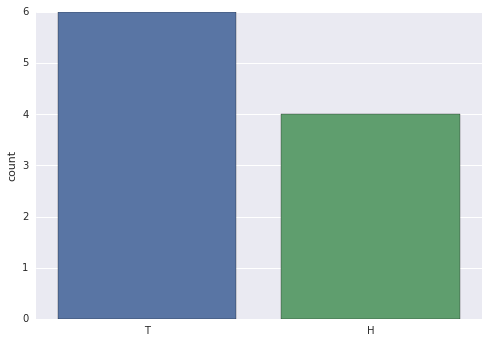

In [8]:
sns.countplot(x=X);

The Bernoulli distribution also allows the probabilities of the two outcomes to be unequal. However, the probabilities of the two outcomes have to sum to $1.0$.

Here is a generative model that uses a Bernoulli random variable to simulate phone ownership:

* `iOS` with probability $p$
* `Android` with probability $q=1-p$:

In [9]:
def plot_phones(p):
    phone_os = np.random.choice(['iOS', 'Android'], 200, p=(p,1-p))
    sns.countplot(x=phone_os)
    plt.ylim(0.0,200)

In [10]:
interact(plot_phones, p=(0.01,0.99,0.01), __manual=True);

### Categorical distribution

The [categorical distribution](https://en.wikipedia.org/wiki/Categorical_distribution) is a generalization of the Bernoulli distribution that includes $k$ possible outcomes, each with a probability of $P_i$, with $\sum_i P_i =1$. The categorial distribution is also implemented by the `numpy.random.choice` function.

Here is a short summary of the properties of the categorical distribution:

* $ X \sim Categorical(P_1, P_2, \ldots, P_k) $
* $ \sum_{i=1}^{k} P_i = 1 $

Here is a $k=4$ categorical distribution of color values:

In [11]:
X = np.random.choice(['red', 'green', 'blue', 'grey'], 50, p=(0.1,0.1,0.3,0.5))
X

array(['blue', 'grey', 'red', 'grey', 'grey', 'blue', 'grey', 'grey',
       'grey', 'grey', 'grey', 'grey', 'blue', 'grey', 'grey', 'grey',
       'blue', 'blue', 'grey', 'grey', 'blue', 'grey', 'red', 'red',
       'blue', 'grey', 'grey', 'blue', 'red', 'red', 'blue', 'grey',
       'grey', 'grey', 'blue', 'blue', 'grey', 'blue', 'blue', 'grey',
       'grey', 'grey', 'grey', 'blue', 'grey', 'blue', 'grey', 'red',
       'green', 'grey'], 
      dtype='<U5')

A horizontal bar chart is an effective way of visualizing data from a categorical distribution:

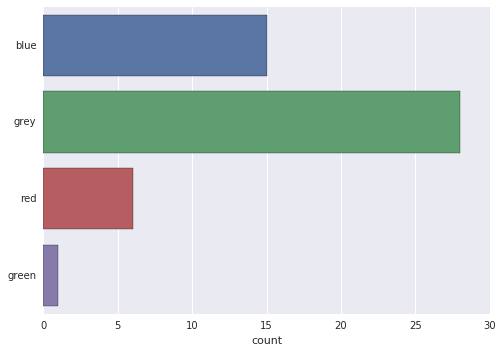

In [12]:
sns.countplot(y=X);

### Binomial distribution

The [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) is another type of generalization of the Bernoulli distribution. The idea of the binomial distribution is to perform `n` Bernoulli trials, each the probability of success $p$ and count how many success there are. It has the following properties:

* $X \sim B(n,p)$
* $p$ is the probability of *success* for each of the $n$ Bernoulli trials
* $X$ is the number of those Bernoulli trails that had an outcome of *success*

In [13]:
n = 10
p = 0.2

The binomial distribution is implemented by `numpy.random.binomial`:

In [14]:
np.random.binomial(n, p)

4

In [15]:
X = np.random.binomial(n, p, 10)
X

array([2, 2, 1, 3, 0, 2, 3, 1, 2, 4])

In [16]:
def plot_binomial(n, p):
    X = np.random.binomial(n, p, 200)
    sns.distplot(X, bins=range(50));
    plt.xlabel("Number of successes out of {} trials".format(n))
    plt.ylabel("Count")

In [17]:
interact(plot_binomial, n=(0,50,1), p=(0.1,0.9,0.1), __manual=True);

### Poisson distribution

The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is used to model events that occur at a fixed average rate per unit time. It has the following properties:

* $ X \sim Poisson(\lambda) $
* $E[X]=\lambda =$ mean number of events per time unit
* $var[X]=\lambda =$ variance in the distribution

Examples include:

* Number of goals by a team in a soccer game
* Number of photons hitting a camera's CCD sensor per second
* Number of email you get per day

In [18]:
λ = 1.0

In [19]:
np.random.poisson(λ)

0

In [20]:
X = np.random.poisson(λ, 20)
X

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 4, 1, 3, 1, 0, 1, 1])

Both the mean and variance should be close to $\lambda=1.0$:

In [21]:
X.mean()

1.05

In [22]:
X.var()

1.0474999999999999

In [23]:
def plot_poisson(λ):
    X = np.random.poisson(λ, size=200)
    sns.distplot(X, bins=range(100))
    plt.xlabel("Number of events")
    plt.ylabel("Count")
    plt.xlim(0.0, 100.0)

In [24]:
interact(plot_poisson, λ=(0, 100), __manual=True);

## Continuous probability distributions

In this notebook, we cover the following continuous probability distributions:

* Uniform
* Normal 
* Poisson 
* Exponential
* Beta
* Dirichlet

### Uniform distribution

The <a href="https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)">uniform distribution</a> returns random variates with equal probabilities in the interval $[a,b]$. It has he following properties:

* $X \sim U(a,b) $
* $X \in [a,b] $
* $E[X] = (a+b)/2$
* $var[X] = \frac{1}{12}(b-a)^2$

In [25]:
a = 0.0
b = 1.0

The uniform distribution is implemented by `numpy.random.uniform`:

In [26]:
np.random.uniform(a, b)

0.3823024676328809

In [27]:
X = np.random.uniform(a, b, size=50)
X

array([ 0.99318237,  0.53716941,  0.93155729,  0.56298893,  0.08906101,
        0.57104296,  0.69015861,  0.38417985,  0.19324309,  0.27128017,
        0.25287356,  0.55086744,  0.43551453,  0.17860946,  0.23250831,
        0.69345629,  0.73350142,  0.95678589,  0.04299521,  0.87735394,
        0.86104405,  0.91759244,  0.99783477,  0.97345188,  0.47798117,
        0.04132031,  0.86107594,  0.18740756,  0.11343364,  0.40549195,
        0.13849037,  0.31518657,  0.08067089,  0.2100209 ,  0.69256145,
        0.16406379,  0.98999659,  0.91965117,  0.99108535,  0.98700425,
        0.12873455,  0.23382545,  0.00845004,  0.55965332,  0.93903347,
        0.3395517 ,  0.6146531 ,  0.3729323 ,  0.9550695 ,  0.50880166])

In [28]:
X.mean()

0.52328799766542322

In [29]:
X.var()

0.10848485271378065

Continuous distribution can be visualized effectively using a histogram, which is one type of distribution plot (rug and kernel density estimate are others). These are all implemented in Seaborn by `seaborn.distplot`:

In [30]:
def plot_uniform(a,b):
    X = np.random.uniform(a,b, size=200)
    sns.distplot(X, bins=20, rug=True, kde=False);
    plt.xlim(0.0, 11.0)
    plt.xlabel('X')

In [31]:
interact(plot_uniform, a=(0.0,5.0), b=(6.0, 11.0), __manual=True);

### Normal distribution

The [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) is one of the most important continuous probability distributions due to the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem). It has the following properties:

* $X \sim N(\mu, \sigma^2)$
* $X \in [-\infty,\infty]$
* $E[X] = \mu$
* $var[X] = \sigma^2$

In [32]:
mu = 0.0
sigma = 2.0

The normal distribution is implemented by `numpy.random.normal`. Note that this takes the standard deviation $\sigma$ rather than the variance as its second argument.

In [33]:
np.random.normal(mu, sigma) # second argument is just sigma

0.7091431947864493

In [34]:
X = np.random.normal(mu, sigma, size=50)
X

array([-2.70323981,  0.25008538,  2.62944301,  1.22115826,  4.95877219,
        1.7195768 , -1.74937621, -0.18923065,  1.72536601, -1.31004377,
       -1.85418286,  2.69897417, -1.84575145, -0.46977333,  1.04059486,
       -0.23472568,  4.08268804,  2.10080989,  1.13742571, -0.05609255,
       -0.47728218, -1.76246796, -0.75778233,  1.07644091,  1.90588451,
        2.49907351, -0.21364719,  1.04727398,  0.70601516, -0.92932653,
        0.2793373 , -0.03262647,  0.02593094, -2.46868347,  0.30668398,
        1.2133609 ,  0.4989414 , -0.60731258, -0.9032189 , -1.20208284,
       -2.06957859,  1.66783273,  2.29260354,  0.37245753,  5.67534962,
       -1.82281025, -1.16182754,  1.68843372, -0.20141099, -0.27866546])

In [35]:
X.mean(), mu

(0.39038748994620531, 0.0)

In [36]:
X.var(), sigma**2

(3.2347258729994173, 4.0)

A histogram is again an effective way of visualizing this distribution:

In [37]:
def plot_normal(mu, sigma):
    X = np.random.normal(mu, sigma, size=300)
    sns.distplot(X, bins=20, rug=True);
    print("mean =", X.mean(), "var =", X.var())
    plt.xlim(-15.0, 15.0)
    plt.xlabel('X')

In [38]:
interact(plot_normal, mu=(-5.0,5.0), sigma=(1.0, 5.0), __manual=True);

### Exponential distribution

The [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) is closely related to the Poisson distribution. Remember the Poisson distribution is based on the Poisson process: a series of events that occur at a fixed average rate per unit time. The Poisson distribution gives the number of events per unit time. The exponential distribution gives the time between those events. It has the following properties:

* $ X \sim Exp(\lambda) $
* $\lambda$ is the *rate parameter*
* $E[X] = 1/\lambda = \beta$ where $\beta$ is the *scale parameter
* $var[X] = \beta^2 $

In [39]:
β=2.0

The exponential distribution is implemented by `numpy.random.exponential(beta)`:

In [40]:
np.random.exponential(β)

4.231751655462265

In [41]:
X = np.random.exponential(β, size=50)
X

array([ 3.16648872,  2.63830492,  2.04950336,  1.86955603,  0.41850962,
        1.32278411,  1.02258449,  1.38013874,  0.58345594,  1.30713007,
        1.51307843,  0.56149367,  1.88654041,  5.77865704,  3.58210103,
        0.9315533 ,  0.38197105,  0.61345201,  4.55430648,  3.52491983,
        0.95496008,  1.00807045,  4.38855965,  0.78112752,  0.23455152,
        0.87022854,  1.56606994,  2.37741849,  1.29723442,  2.93486432,
        0.37352224,  0.51443763,  7.05400747,  2.56711155,  1.12778451,
        0.06699619,  1.62709543,  5.21466452,  1.88123197,  4.97495296,
        0.52492701,  2.05932942,  4.11178935,  3.83444085,  2.20039175,
        2.76208724,  3.3575107 ,  1.64332534,  3.37004211,  3.24117132])

In [42]:
def plot_exponential(β):
    X = np.random.exponential(β, 200)
    sns.distplot(X, rug=True)
    print("mean =", X.mean())
    plt.xlabel("Time between Poisson events")
    plt.xlim(0.0, 50.0)

In [43]:
interact(plot_exponential, β=(1.0, 20.0), __manual=True);

### Beta distribution

Sometimes you need to build generative models that need probabilities that are themselves random variables. The [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) is a probability distribution whose outcomes are probabilities. It has the following properties:

* $ X \sim Beta(\alpha, \beta) $
* $ X \in [0.0,1.0] $
* $ E[X] = \frac{\alpha}{\alpha+\beta} $
* $ var[X] = \frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)} $

In [44]:
α = 0.5
β = 2.0

The beta distribution is implemented by `numpy.random.beta(alpha, beta)`:

In [45]:
np.random.beta(α, β)

0.07964626125315115

In [46]:
X = np.random.beta(α, β, 50)
X

array([  4.78148354e-01,   1.34979372e-01,   1.41048921e-01,
         2.52088213e-01,   6.81384251e-02,   2.41339137e-01,
         4.43060540e-01,   3.09644199e-01,   8.17258647e-01,
         5.19273724e-02,   1.26241027e-01,   8.54024879e-05,
         1.02866249e-02,   1.40076887e-02,   2.74750337e-01,
         2.44842541e-02,   3.96616208e-01,   4.65388089e-03,
         7.32582315e-01,   1.68123911e-01,   1.99720705e-01,
         7.21572421e-02,   3.02469198e-02,   5.40174962e-02,
         6.78678983e-02,   3.92714087e-01,   3.22445353e-01,
         5.23013531e-01,   5.33270562e-01,   6.50560448e-01,
         4.84611301e-01,   3.59856040e-01,   2.68471775e-01,
         2.77850921e-02,   9.42144352e-01,   2.15245681e-01,
         4.41941863e-02,   1.06923333e-01,   1.27018518e-01,
         2.39713667e-03,   2.78792954e-02,   6.45687856e-01,
         5.80189625e-01,   3.09128258e-03,   1.13425332e-01,
         1.41017320e-01,   2.57115927e-02,   5.38288826e-01,
         5.07438039e-01,

In [47]:
X.mean(), α/(α+β)

(0.2549463270932707, 0.2)

In [48]:
X.var()

0.059035400650719536

In [49]:
def plot_beta(α, β):
    X = np.random.beta(α, β, 200)
    sns.distplot(X, rug=True)
    plt.xlabel('X')

In [50]:
interact(plot_beta, α=(0.1, 5.0, 0.1), β=(0.1, 5.0, 0.1), __manual=True);

The beta distribution is often used along with the binomial distribution in generative models. Recall that the binomial distribution $B(n,p)$ has an input parameter $p$ that is the probability of success in the Bernoulli trial. Here is a simple generative model where the $p$ variable in the binomial distribution is itself a beta distributed random variable:

$$ X_1 \sim Beta(0.5, 1.0) $$
$$ X_2 \sim B(100, X_1) $$

When a parameter in a probability distribution is itself a random variable, we call the model a *hierarchical model*. Here are `100` realizations of this hierarchical model:

In [51]:
X1 = np.random.beta(0.5, 1.0, 100)
X2 = np.array([np.random.choice([0,1],p=(p,1-p)) for p in X1])

These two random variables $X_1$ and $X_2$ are correlated, so we need to visualize their joint distribution. Seaborn has a very nice `jointplot` for this purpose:

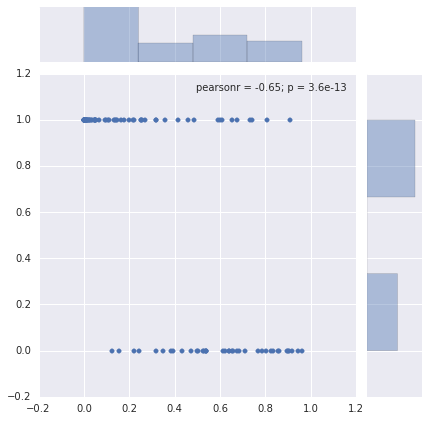

In [52]:
sns.jointplot(X1, X2);

### Dirichlet distribution

The [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution) is a multidimensional generalization of the beta distribution. Where the beta distribution returns a single probability, the Dirichlet distribution returns a vector of probabilities that are normalize to $1!. It has the following properties:

* $ \vec{X} \sim Dir(\vec{\alpha}) $
* $ X_i \in [0,1]$ is a vector of $k$ probabilities, such that $\sum_{i=1}^{k} X_i = 1 $
* $ \alpha_i $ is a vector of $k$ *concentrations* that parametrize the distribution

The Dirichlet distribution is implemented by `numpy.random.dirichlet` and takes a sequence of alpha values:

In [53]:
np.random.dirichlet(alpha=(0.1, 0.2))

array([ 0.99238465,  0.00761535])

Again, because the values returned by the distribution are two dimensional, we need to make a 2d scatterplot or joint distribution plot:

In [54]:
def plot_dirichlet(alpha1, alpha2):
    X = np.random.dirichlet((alpha1, alpha2), 200)
    sns.jointplot(X[:,0], X[:,1])

In the following visualization, notice how the points returned by the Dirichlet distribution lie on the line where $X_1 + X_2 = 1$.

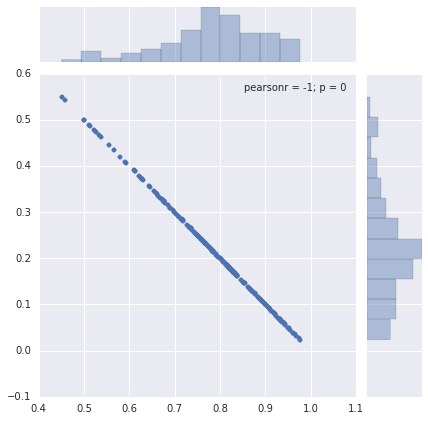

In [55]:
interact(plot_dirichlet, alpha1=(0.1, 10.0, 0.1), alpha2=(0.1, 10.0, 0.1));

The Dirichlet distribution is often paired with the categorical distribution in hierarchical models when the probabilities that go into the categorical distribution are themselves random variables. Here is a simple hierarchical model that does this:

$$ \vec{X}_1 \sim Dir([2.0, 2.0, 2.0]) $$

$$ X_2 \sim Categorical(\vec{X}_1) $$

In [56]:
X1 = np.random.dirichlet((2.0, 2.0, 2.0), size=100)
X2 = np.array([np.random.choice(['red', 'green', 'blue'], p=p) for p in X1])

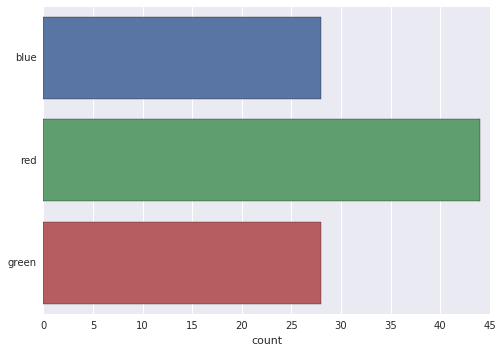

In [57]:
sns.countplot(y=X2);